In [46]:
import numpy as np
import pandas as pd

In [47]:
import matplotlib.pyplot as plt

In [48]:
import seaborn as sns

In [49]:
df=pd.read_csv('HEART (3).csv')

In [50]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [51]:
#Since random forest has proven to provide the best results we plan to consider the top nine features including target values of random forest
# for our work in Artificial neural networks
df_new = df.loc[:,['cp','oldpeak','thal','ca','thalach','age','chol','trestbps','exang','target']]

In [52]:
X=df_new.drop('target',axis=1).values
y=df_new['target'].values

In [53]:
X

array([[  0. ,   1. ,   3. , ..., 212. , 125. ,   0. ],
       [  0. ,   3.1,   3. , ..., 203. , 140. ,   1. ],
       [  0. ,   2.6,   3. , ..., 174. , 145. ,   1. ],
       ...,
       [  0. ,   1. ,   2. , ..., 275. , 110. ,   1. ],
       [  0. ,   0. ,   2. , ..., 254. , 110. ,   0. ],
       [  0. ,   1.4,   3. , ..., 188. , 120. ,   0. ]])

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
scaler=MinMaxScaler()

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [12]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [14]:
model=Sequential()
model.add(Dense(9, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(14,activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [15]:
model.compile(optimizer='adam',loss='binary_crossentropy')
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)
model.fit(X_train, y_train, epochs=500, batch_size=4,validation_data=(X_test,y_test),callbacks=[early_stop])

Train on 717 samples, validate on 308 samples
Epoch 1/500
717/717 [==============================] - 2s 3ms/sample - loss: 0.6288 - val_loss: 0.5609
Epoch 2/500
717/717 [==============================] - 0s 488us/sample - loss: 0.5118 - val_loss: 0.4770
Epoch 3/500
717/717 [==============================] - 0s 458us/sample - loss: 0.4518 - val_loss: 0.4494
Epoch 4/500
717/717 [==============================] - 0s 493us/sample - loss: 0.4369 - val_loss: 0.4327
Epoch 5/500
717/717 [==============================] - 0s 500us/sample - loss: 0.4224 - val_loss: 0.4242
Epoch 6/500
717/717 [==============================] - 0s 480us/sample - loss: 0.4144 - val_loss: 0.4309
Epoch 7/500
717/717 [==============================] - 0s 437us/sample - loss: 0.4054 - val_loss: 0.4123
Epoch 8/500
717/717 [==============================] - 0s 450us/sample - loss: 0.4035 - val_loss: 0.4090
Epoch 9/500
717/717 [==============================] - 0s 454us/sample - loss: 0.3962 - val_loss: 0.4026
Epoch 10/50

717/717 [==============================] - 0s 503us/sample - loss: 0.2528 - val_loss: 0.3138
Epoch 78/500
717/717 [==============================] - 0s 524us/sample - loss: 0.2494 - val_loss: 0.3221
Epoch 79/500
717/717 [==============================] - 0s 521us/sample - loss: 0.2511 - val_loss: 0.3258
Epoch 80/500
717/717 [==============================] - 0s 533us/sample - loss: 0.2449 - val_loss: 0.3044
Epoch 81/500
717/717 [==============================] - 0s 536us/sample - loss: 0.2480 - val_loss: 0.3218
Epoch 82/500
717/717 [==============================] - 0s 520us/sample - loss: 0.2472 - val_loss: 0.3355
Epoch 83/500
717/717 [==============================] - 0s 501us/sample - loss: 0.2402 - val_loss: 0.3063
Epoch 84/500
717/717 [==============================] - 0s 563us/sample - loss: 0.2430 - val_loss: 0.3033
Epoch 85/500
717/717 [==============================] - 0s 506us/sample - loss: 0.2388 - val_loss: 0.3021
Epoch 86/500
717/717 [==============================] - 0s 

Epoch 154/500
717/717 [==============================] - 0s 525us/sample - loss: 0.1530 - val_loss: 0.2247
Epoch 155/500
717/717 [==============================] - 0s 519us/sample - loss: 0.1532 - val_loss: 0.2744
Epoch 156/500
717/717 [==============================] - 0s 487us/sample - loss: 0.1554 - val_loss: 0.2228
Epoch 157/500
717/717 [==============================] - 0s 529us/sample - loss: 0.1550 - val_loss: 0.2539
Epoch 158/500
717/717 [==============================] - 0s 546us/sample - loss: 0.1504 - val_loss: 0.2501
Epoch 159/500
717/717 [==============================] - 0s 506us/sample - loss: 0.1604 - val_loss: 0.2039
Epoch 160/500
717/717 [==============================] - 0s 502us/sample - loss: 0.1462 - val_loss: 0.2096
Epoch 161/500
717/717 [==============================] - 0s 495us/sample - loss: 0.1398 - val_loss: 0.2169
Epoch 162/500
717/717 [==============================] - 0s 565us/sample - loss: 0.1418 - val_loss: 0.2015
Epoch 163/500
717/717 [==============

717/717 [==============================] - 0s 469us/sample - loss: 0.1036 - val_loss: 0.1469
Epoch 231/500
717/717 [==============================] - 0s 487us/sample - loss: 0.1083 - val_loss: 0.1418
Epoch 232/500
717/717 [==============================] - 0s 566us/sample - loss: 0.1144 - val_loss: 0.1326
Epoch 233/500
717/717 [==============================] - 0s 543us/sample - loss: 0.1025 - val_loss: 0.1343
Epoch 234/500
717/717 [==============================] - 0s 534us/sample - loss: 0.1034 - val_loss: 0.1578
Epoch 235/500
717/717 [==============================] - 0s 505us/sample - loss: 0.1031 - val_loss: 0.1342
Epoch 236/500
717/717 [==============================] - 0s 524us/sample - loss: 0.1021 - val_loss: 0.1295
Epoch 237/500
717/717 [==============================] - 0s 534us/sample - loss: 0.1019 - val_loss: 0.1320
Epoch 238/500
717/717 [==============================] - 0s 478us/sample - loss: 0.0996 - val_loss: 0.1335
Epoch 239/500
717/717 [============================

717/717 [==============================] - 0s 591us/sample - loss: 0.0673 - val_loss: 0.1216
Epoch 307/500
717/717 [==============================] - 0s 472us/sample - loss: 0.0809 - val_loss: 0.0847
Epoch 308/500
717/717 [==============================] - 0s 519us/sample - loss: 0.0664 - val_loss: 0.0881
Epoch 309/500
717/717 [==============================] - 0s 602us/sample - loss: 0.0629 - val_loss: 0.1039
Epoch 310/500
717/717 [==============================] - 0s 578us/sample - loss: 0.0904 - val_loss: 0.0998
Epoch 311/500
717/717 [==============================] - 0s 550us/sample - loss: 0.0704 - val_loss: 0.0972
Epoch 312/500
717/717 [==============================] - 0s 566us/sample - loss: 0.0673 - val_loss: 0.0906
Epoch 313/500
717/717 [==============================] - 0s 549us/sample - loss: 0.0818 - val_loss: 0.1916
Epoch 314/500
717/717 [==============================] - 0s 585us/sample - loss: 0.0858 - val_loss: 0.1190
Epoch 315/500
717/717 [============================

717/717 [==============================] - 0s 493us/sample - loss: 0.1148 - val_loss: 0.0741
Epoch 383/500
717/717 [==============================] - 0s 456us/sample - loss: 0.0602 - val_loss: 0.0622
Epoch 384/500
717/717 [==============================] - 0s 470us/sample - loss: 0.0528 - val_loss: 0.0605
Epoch 385/500
717/717 [==============================] - 0s 476us/sample - loss: 0.0501 - val_loss: 0.0603
Epoch 386/500
717/717 [==============================] - 0s 455us/sample - loss: 0.0549 - val_loss: 0.0621
Epoch 387/500
717/717 [==============================] - 0s 470us/sample - loss: 0.0988 - val_loss: 0.3278
Epoch 388/500
717/717 [==============================] - 0s 470us/sample - loss: 0.0819 - val_loss: 0.0690
Epoch 389/500
717/717 [==============================] - 0s 463us/sample - loss: 0.0497 - val_loss: 0.0709
Epoch 390/500
717/717 [==============================] - 0s 538us/sample - loss: 0.0514 - val_loss: 0.0596
Epoch 391/500
717/717 [============================

In [16]:
loss=pd.DataFrame(model.history.history)

In [17]:
loss.head()

,loss,val_loss
0,0.628810,0.560932
1,0.511752,0.477034
2,0.451827,0.449410
3,0.436933,0.432668
4,0.422390,0.424179


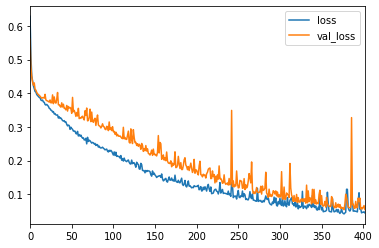

In [18]:
loss.plot()

In [19]:
predictions=model.predict_classes(X_test)

In [20]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[145   3]
 [  0 160]]


              precision    recall  f1-score   support

           0       1.00      0.98      0.99       148
           1       0.98      1.00      0.99       160

    accuracy                           0.99       308
   macro avg       0.99      0.99      0.99       308
weighted avg       0.99      0.99      0.99       308



In [21]:
l=list(model.predict(X_test))

In [22]:
l

[array([0.], dtype=float32),
 array([0.9905337], dtype=float32),
 array([2.7805567e-05], dtype=float32),
 array([2.682209e-07], dtype=float32),
 array([3.6656857e-06], dtype=float32),
 array([0.], dtype=float32),
 array([0.99135333], dtype=float32),
 array([0.9846632], dtype=float32),
 array([0.86879706], dtype=float32),
 array([3.6656857e-06], dtype=float32),
 array([0.9942117], dtype=float32),
 array([0.9990821], dtype=float32),
 array([0.9999994], dtype=float32),
 array([0.9999968], dtype=float32),
 array([0.98296595], dtype=float32),
 array([0.94176096], dtype=float32),
 array([0.], dtype=float32),
 array([0.29732358], dtype=float32),
 array([0.], dtype=float32),
 array([0.00113264], dtype=float32),
 array([0.94924223], dtype=float32),
 array([0.9999566], dtype=float32),
 array([0.9999995], dtype=float32),
 array([0.9906591], dtype=float32),
 array([0.], dtype=float32),
 array([0.9996808], dtype=float32),
 array([0.22109893], dtype=float32),
 array([0.994572], dtype=float32),
 arra

In [23]:
for i in range(len(l)):
    a=l[i]
    if(a<0.00005):
        print("Perfectly alright no heart failure")
    elif(0<a<0.4):
        print("Low Risk of having a heart failure")
    elif(0.4<a<0.6):
        print("Medium Risk of having a heart failure")
    else:
        print("High Risk of having a heart failure")

Perfectly alright no heart failure
High Risk of having a heart failure
Perfectly alright no heart failure
Perfectly alright no heart failure
Perfectly alright no heart failure
Perfectly alright no heart failure
High Risk of having a heart failure
High Risk of having a heart failure
High Risk of having a heart failure
Perfectly alright no heart failure
High Risk of having a heart failure
High Risk of having a heart failure
High Risk of having a heart failure
High Risk of having a heart failure
High Risk of having a heart failure
High Risk of having a heart failure
Perfectly alright no heart failure
Low Risk of having a heart failure
Perfectly alright no heart failure
Low Risk of having a heart failure
High Risk of having a heart failure
High Risk of having a heart failure
High Risk of having a heart failure
High Risk of having a heart failure
Perfectly alright no heart failure
High Risk of having a heart failure
Low Risk of having a heart failure
High Risk of having a heart failure
Perf

In [24]:
l=confusion_matrix(y_test,predictions)

In [25]:
precision=(l[1][1]/(l[1][1] + l[0][1]))
recall=(l[1][1]/(l[1][0] + l[1][1]))
accuracy=((l[0][0]+l[1][1])/(l[0][0]+l[0][1]+l[1][0]+l[1][1]))
f1_score=2*((precision*recall)/(precision+recall))

In [26]:
d={'Data':['precision','recall','accuracy','f1score'],'Values':[precision,recall,accuracy,f1_score]}

In [27]:
tf=pd.DataFrame(d)

In [28]:
tf

,Data,Values
0,precision,0.981595
1,recall,1.000000
2,accuracy,0.990260
3,f1score,0.990712


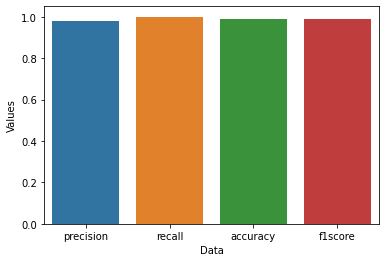

In [29]:
sns.barplot(x=tf['Data'],y=tf['Values'])

In [ ]:
l=np.array([[1,2,3],[4,5,6]])
m=np.array([[2,3,4],[7,8,9]])

In [ ]:
l

In [ ]:
m

In [ ]:
np.dot(l.T,m)

In [ ]:
l.T

In [ ]:
m

In [58]:
d={'age':[45],'sex':[0],'cp':[1],'trestbps':[164],'chol':[202],'fbs':[0],'restcg':[1],'thalach':[142],'exang':[1],'oldpeak':[0.8],'slope':[2],'ca':[1],'thal':[3]}

In [59]:
tf=pd.DataFrame(data=d)

In [60]:
tf.head()

,age,sex,cp,trestbps,chol,fbs,restcg,thalach,exang,oldpeak,slope,ca,thal
0,45,0,1,164,202,0,1,142,1,0.8,2,1,3


In [63]:
tf=tf[['cp','oldpeak','thal','ca','thalach','age','chol','trestbps','exang']].values

In [64]:
p=scaler.transform(tf)

In [72]:
l=list(model.predict(p)[0])

In [73]:
l

[0.9999634]

In [74]:
a=l[0]
if(a<0.00005):
    print("Perfectly alright no heart failure")
elif(0<a<0.4):
    print("Low Risk of having a heart failure")
elif(0.4<a<0.6):
    print("Medium Risk of having a heart failure")
else:
    print("High Risk of having a heart failure")

High Risk of having a heart failure
